In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl
from pywaffle import Waffle

## Coursera Task for Final Assignment

Sections required in your report:

- Brief description of the data set and a summary of its attributes
- Initial plan for data exploration
- Actions taken for data cleaning and feature engineering
- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
- Formulating at least 3 hypothesis about this data
- Conducting a formal significance test for one of the hypotheses and discuss the results 
- Suggestions for next steps in analyzing this data
- A paragraph that summarizes the quality of this data set and a request for additional data if needed

## Brief Description of the Dataset and Summary of its attributes  

In the era of data driven actions and information disclosure to fulfill the most basic human nature and rights called 'curiosity', we thrive this pandemic together and do our best to make a better future. Scientist, Engineer, Medical Personnel, Government, and all of the human work together and cooperate with respect of their expertise to save others life and survive this global pandemic. By giving the public 

This Covid vaccination data ranges from 2020-2021 contain the information about Countries, Covid Cases, Covid fatalities rates and victims, government action index, vaccination information, and etc. hopefully this data can fulfill the data transparency and can bring useful insights to human kind. 

## Workflow

Data Cleaning -> EDA -> Feature Engineering -> Modeling -> Evaluating -> Deploy

## Initial Planning

- dealing with missing value and fill with relevant values or remove bad records
- feature selection : drop/remove unnecessary column or redundant information
- extract useful information from existing information
- define question/problem


## Question to solve

1. what and when is the peak indonesia's covid case?
2. latest total indonesia's covid case
3. indonesia's covid case among the world
4. indonesia's government stringency index among its neighbors
5. 

In [2]:
#data source: https://www.kaggle.com/fedesoriano/coronavirus-covid19-vaccinations-data
# source 2 : https://ourworldindata.org/covid-vaccinations
df = pd.read_csv("C:/Users/ACER/Data science path/Jose lesson/DATA/owid-covid-data.csv")

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62432 entries, 0 to 62431
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               62077 non-null  object 
 1   continent                              61706 non-null  object 
 2   location                               62432 non-null  object 
 3   date                                   62432 non-null  object 
 4   total_cases                            61833 non-null  float64
 5   new_cases                              61826 non-null  float64
 6   new_cases_smoothed                     60867 non-null  float64
 7   total_deaths                           53273 non-null  float64
 8   new_deaths                             53272 non-null  float64
 9   new_deaths_smoothed                    60867 non-null  float64
 10  total_cases_per_million                61478 non-null  float64
 11  ne

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df_id = df.loc[df['location']=='Indonesia'].copy()
df_id.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25526,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,0.007,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694
25527,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694
25528,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694
25529,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,0.007,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694
25530,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,0.015,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694


In [8]:
def missing_percentage(dataf):
    na_val = dataf.isnull().sum()/len(dataf) *100
    na_val = na_val[na_val >0 ].sort_values()
    return na_val

In [9]:
missing_percentage(df_id)

new_cases_smoothed                         1.510574
new_deaths_smoothed_per_million            1.510574
new_cases_smoothed_per_million             1.510574
stringency_index                           1.510574
new_deaths_smoothed                        1.510574
new_deaths                                 2.719033
total_deaths_per_million                   2.719033
new_deaths_per_million                     2.719033
total_deaths                               2.719033
tests_units                                4.531722
new_tests_smoothed_per_thousand            6.646526
new_tests_smoothed                         6.646526
tests_per_case                             6.948640
positive_rate                              6.948640
reproduction_rate                          7.552870
total_tests_per_thousand                  16.616314
total_tests                               16.616314
new_tests                                 24.169184
new_tests_per_thousand                    24.169184
new_vaccinat

In [10]:
df_id.drop(['icu_patients','weekly_hosp_admissions',
            'weekly_icu_admissions_per_million',
            'weekly_icu_admissions',
            'hosp_patients_per_million',
            'hosp_patients',
           'icu_patients_per_million',
           'weekly_hosp_admissions_per_million',
           'people_fully_vaccinated',
           'people_fully_vaccinated_per_hundred',
           'new_vaccinations',
           'people_vaccinated',
           'total_vaccinations',
           'total_vaccinations_per_hundred',
           'new_vaccinations_smoothed',
           'new_vaccinations_smoothed_per_million',
           'people_vaccinated_per_hundred'],axis=1,inplace=True)

In [11]:
missing_id = missing_percentage(df_id)

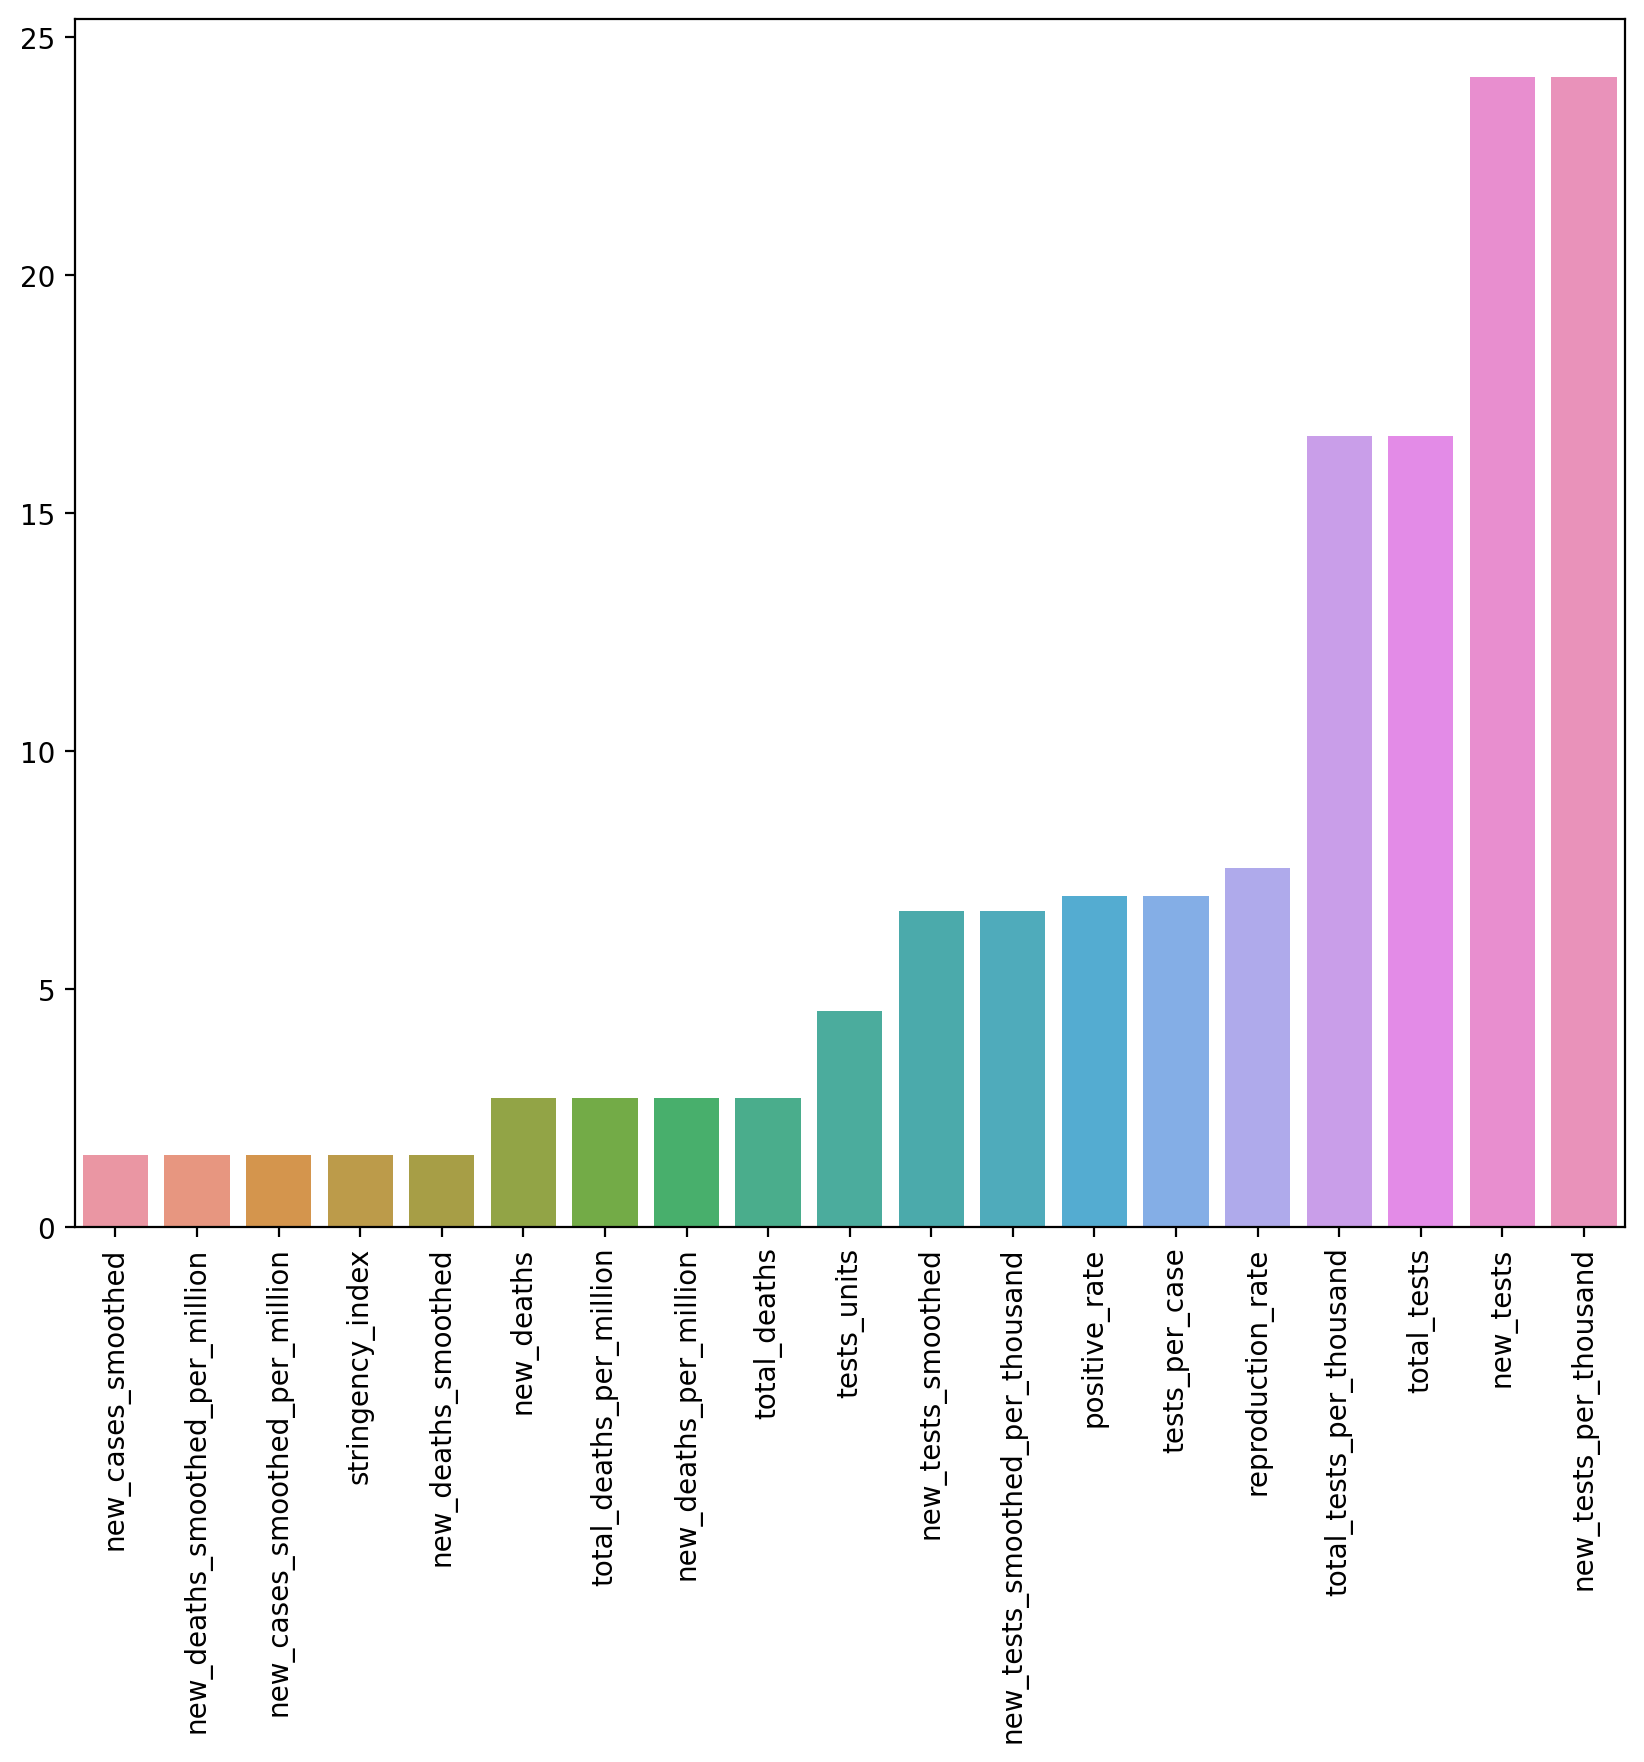

In [12]:
plt.figure(figsize=(10,8),dpi=200)
sns.barplot(x=missing_id.index,y=missing_id.values)
plt.xticks(rotation=90)
plt.show()

In [13]:
df_id['reproduction_rate']=df_id['reproduction_rate'].fillna(value=np.mean(df_id['reproduction_rate']))
df_id['reproduction_rate'].isnull().sum()

0

In [14]:
df_id.drop(['new_cases_smoothed',
            'new_deaths_smoothed',
            'total_cases_per_million',
            'new_cases_per_million',
            'new_cases_smoothed_per_million',
           'total_deaths_per_million',
           'new_deaths_per_million',
           'new_deaths_smoothed_per_million',
           'new_tests_per_thousand'],axis=1,inplace=True)

In [15]:
df_id.drop('total_tests_per_thousand',axis=1,inplace=True)

In [16]:
df['tests_units'].describe().loc['top']

'tests performed'

In [17]:
df_id['new_tests'] = df_id['new_tests'].fillna(value=0)
df_id['tests_per_case'] = df_id['tests_per_case'].fillna(value=0)
df_id.drop(['positive_rate',
           'new_tests_smoothed',
           'new_tests_smoothed_per_thousand'],axis=1,inplace=True)
df_id['new_deaths'] = df_id['new_deaths'].fillna(value=0)
df_id['stringency_index'] = df_id['stringency_index'].fillna(value=np.mean(df_id['stringency_index']))
df_id['tests_units'] = df_id['tests_units'].fillna(value=df_id['tests_units'].describe().loc['top'])

In [18]:
missing_percentage(df_id)

total_deaths     2.719033
total_tests     16.616314
dtype: float64

In [19]:
df_id['total_tests'] = df_id['total_tests'].fillna(0)
df_id['total_deaths'] = df['total_deaths'].fillna(0)

In [20]:
df_id.drop(index=25856,axis=0,inplace=True)

## malaysia's data

In [21]:
df_mys = df.loc[df['location']=='Malaysia'].copy()
df_mys['reproduction_rate']=df_mys['reproduction_rate'].fillna(value=np.mean(df_mys['reproduction_rate']))
df_mys['reproduction_rate'].isnull().sum()
df_mys.drop(['icu_patients','weekly_hosp_admissions',
            'weekly_icu_admissions_per_million',
            'weekly_icu_admissions',
            'hosp_patients_per_million',
            'hosp_patients',
           'icu_patients_per_million',
           'weekly_hosp_admissions_per_million',
           'people_fully_vaccinated',
           'people_fully_vaccinated_per_hundred',
           'new_vaccinations',
           'people_vaccinated',
           'total_vaccinations',
           'total_vaccinations_per_hundred',
           'new_vaccinations_smoothed',
           'new_vaccinations_smoothed_per_million',
           'people_vaccinated_per_hundred'],axis=1,inplace=True)
df_mys.drop(['new_cases_smoothed',
            'new_deaths_smoothed',
            'total_cases_per_million',
            'new_cases_per_million',
            'new_cases_smoothed_per_million',
           'total_deaths_per_million',
           'new_deaths_per_million',
           'new_deaths_smoothed_per_million',
           'new_tests_per_thousand'],axis=1,inplace=True)
df_mys.drop('total_tests_per_thousand',axis=1,inplace=True)
df_mys['new_tests'] = df_mys['new_tests'].fillna(value=0)
df_mys['tests_per_case'] = df_mys['tests_per_case'].fillna(value=0)
df_mys.drop(['positive_rate',
           'new_tests_smoothed',
           'new_tests_smoothed_per_thousand'],axis=1,inplace=True)
df_mys['new_deaths'] = df_mys['new_deaths'].fillna(value=0)
df_mys['stringency_index'] = df_mys['stringency_index'].fillna(value=np.mean(df_mys['stringency_index']))
df_mys['tests_units'] = df_mys['tests_units'].fillna(value=df_mys['tests_units'].describe().loc['top'])
df_mys['total_tests'] = df_mys['total_tests'].fillna(0)
df_mys['total_deaths'] = df_mys['total_deaths'].fillna(0)
df_mys['month'] = df_mys['date'].dt.month
df_mys['daysof_month'] = df_mys['date'].dt.day
df_mys['days_of_week']=df_mys['date'].dt.dayofweek
df_mys_2020 = df_mys.loc[df_mys['date'].dt.year==2020]

## Singapore's Data

In [22]:
df_sgp = df.loc[df['location']=='Singapore'].copy()
df_sgp['reproduction_rate']=df_sgp['reproduction_rate'].fillna(value=np.mean(df_sgp['reproduction_rate']))
df_sgp['reproduction_rate'].isnull().sum()
df_sgp.drop(['icu_patients','weekly_hosp_admissions',
            'weekly_icu_admissions_per_million',
            'weekly_icu_admissions',
            'hosp_patients_per_million',
            'hosp_patients',
           'icu_patients_per_million',
           'weekly_hosp_admissions_per_million',
           'people_fully_vaccinated',
           'people_fully_vaccinated_per_hundred',
           'new_vaccinations',
           'people_vaccinated',
           'total_vaccinations',
           'total_vaccinations_per_hundred',
           'new_vaccinations_smoothed',
           'new_vaccinations_smoothed_per_million',
           'people_vaccinated_per_hundred'],axis=1,inplace=True)
df_sgp.drop(['new_cases_smoothed',
            'new_deaths_smoothed',
            'total_cases_per_million',
            'new_cases_per_million',
            'new_cases_smoothed_per_million',
           'total_deaths_per_million',
           'new_deaths_per_million',
           'new_deaths_smoothed_per_million',
           'new_tests_per_thousand'],axis=1,inplace=True)
df_sgp.drop('total_tests_per_thousand',axis=1,inplace=True)
df_sgp['new_tests'] = df_sgp['new_tests'].fillna(value=0)
df_sgp['tests_per_case'] = df_sgp['tests_per_case'].fillna(value=0)
df_sgp.drop(['positive_rate',
           'new_tests_smoothed',
           'new_tests_smoothed_per_thousand'],axis=1,inplace=True)
df_sgp['new_deaths'] = df_sgp['new_deaths'].fillna(value=0)
df_sgp['stringency_index'] = df_sgp['stringency_index'].fillna(value=np.mean(df_sgp['stringency_index']))
df_sgp['tests_units'] = df_sgp['tests_units'].fillna(value=df_sgp['tests_units'].describe().loc['top'])
df_sgp['total_tests'] = df_sgp['total_tests'].fillna(0)
df_sgp['total_deaths'] = df_sgp['total_deaths'].fillna(0)
df_sgp['month'] = df_sgp['date'].dt.month
df_sgp['daysof_month'] = df_sgp['date'].dt.day
df_sgp['days_of_week']=df_sgp['date'].dt.dayofweek
df_sgp_2020 = df_sgp.loc[df_sgp['date'].dt.year==2020]

## Exploratory Data Analysis

In [23]:
df_id['month'] = df_id['date'].dt.month
df_id['daysof_month'] = df_id['date'].dt.day

In [24]:
df_id_2020 = df_id.loc[df_id['date'].dt.year==2020]

In [25]:
df_id_2020.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,daysof_month
25526,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,28.70,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,2
25527,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,3
25528,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,4
25529,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,5
25530,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,6


In [26]:
df_id_2020['days_of_week']=df_id_2020['date'].dt.dayofweek

<ipython-input-26-3436758c7926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_2020['days_of_week']=df_id_2020['date'].dt.dayofweek


In [27]:
df_id_2020.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,month,daysof_month,days_of_week
25526,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,28.70,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,2,0
25527,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,3,1
25528,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,4,2
25529,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,5,3
25530,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,0.0,0.0,1.153627,0.0,0.0,0.0,people tested,37.04,273523621.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.694,3,6,4


[]

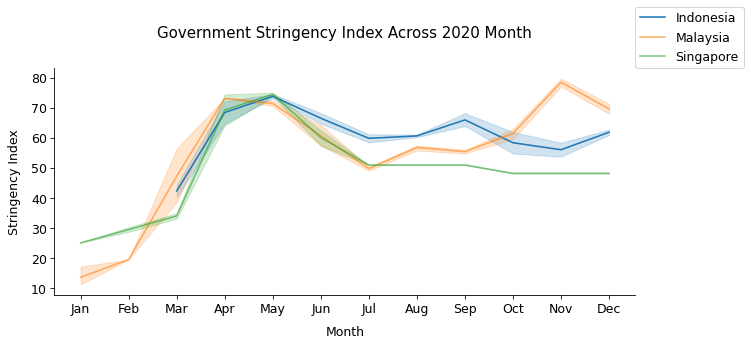

In [28]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,4),dpi=75)
sns.lineplot(x='month',y='stringency_index',data=df_id_2020,lw=1.5,label='Indonesia')
sns.lineplot(x='month',y='stringency_index',data=df_mys_2020,alpha=0.6,label='Malaysia')
sns.lineplot(x='month',y='stringency_index',data=df_sgp_2020,alpha=0.6,label='Singapore')
plt.xticks(range(1,13))
plt.gca().set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Month',labelpad=10)
plt.ylabel("Stringency Index",labelpad=10)

plt.title("Government Stringency Index Across 2020 Month",pad=30)
plt.legend(loc=[1.,1])
plt.plot()

In [29]:
df_id_2020['new_cases']

25526       2.0
25527       0.0
25528       0.0
25529       0.0
25530       2.0
          ...  
25826    6528.0
25827    5854.0
25828    7903.0
25829    8002.0
25830    8074.0
Name: new_cases, Length: 305, dtype: float64

[]

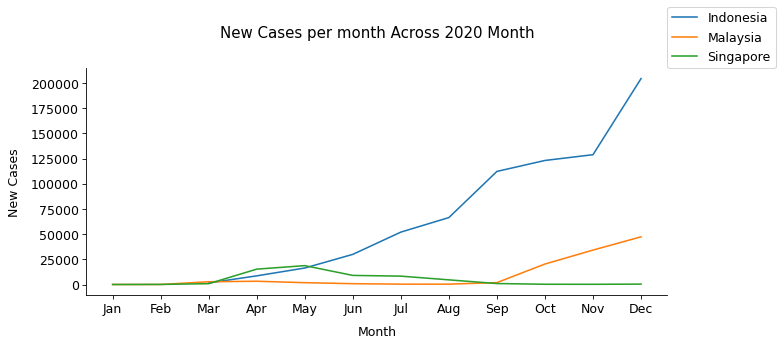

In [30]:
case_permonth_id = df_id_2020.groupby('month')['new_cases'].sum()
case_permonth_mys = df_mys_2020.groupby('month')['new_cases'].sum()
case_permonth_sgp = df_sgp_2020.groupby('month')['new_cases'].sum()

plt.figure(figsize=(10,4),dpi=75)
sns.lineplot(x=case_permonth_id.index,y=case_permonth_id.values,label='Indonesia')
sns.lineplot(x=case_permonth_mys.index,y=case_permonth_mys.values,label='Malaysia')
sns.lineplot(x=case_permonth_sgp.index,y=case_permonth_sgp.values,label='Singapore')
plt.xticks(range(1,13))
plt.gca().set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Month',labelpad=10)
plt.ylabel("New Cases",labelpad=10)


plt.title("New Cases per month Across 2020 Month",pad=30)
plt.legend(loc=[1.,1])
plt.plot()

In [31]:
case_perday = df_id_2020.groupby('days_of_week')['new_cases'].sum()
case_perday

days_of_week
0     91845.0
1    100544.0
2    111676.0
3    119156.0
4    107928.0
5    109437.0
6    102612.0
Name: new_cases, dtype: float64

[]

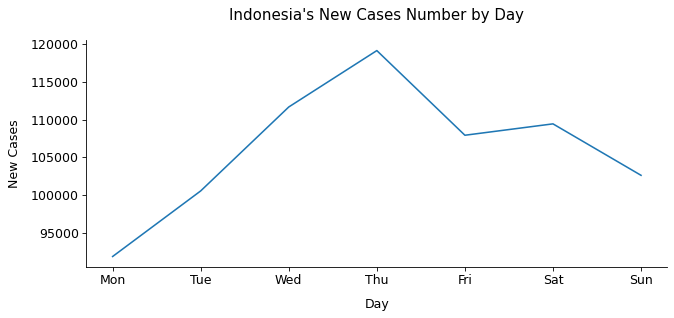

In [32]:
plt.figure(figsize=(10,4),dpi=75)
sns.lineplot(x=case_perday.index,y=case_perday.values)
plt.xticks(range(7))

plt.xlabel('Day',labelpad=10)
plt.ylabel('New Cases',labelpad=10)
plt.gca().set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Indonesia\'s New Cases Number by Day',pad=20)

plt.plot()

In [33]:
avg_cases_perday = sum(df_id_2020['new_cases'])/365
avg_cases_perday

2036.158904109589

In [34]:
np.corrcoef(df_id_2020['stringency_index'],df_id_2020['new_cases'])

array([[1.        , 0.00819863],
       [0.00819863, 1.        ]])

## Hypothesises

1. In Indonesia, the government action (policy, strictness, etc) doesn't affect the suppression of new covid cases
2. Indonesia has the highest covid case among Singapore and Malaysia
3. Across 2020, Indonesia's average covid new case per day has reached 2036.16

## Hypothesis Testing

In [48]:
from scipy.stats import ttest_ind,f_oneway
id_data = list(df_id_2020['new_cases']) # Indonesia's new cases data
mys_data  = list(df_mys_2020['new_cases']) #Malaysia's new cases data
sgp_data = list(df_sgp_2020['new_cases']) #Singapore's new cases data

tstat1,pval1 =ttest_ind(id_data,mys_data) #2 sample test
tstat2,pval2 = f_oneway(id_data,mys_data,sgp_data) #ANOVA test

#H0 = Indonesia's new cases is not different than other 2 countries
#H1 = Indoensia's new cases is significantly differennt than the other 2 countries

def hypotest_result(p):
    if p > 0.05:
        print('Cannot Reject the H0')
        
    else:
        print('H0 is rejected')
        
hypotest_result(pval2)
print(f'the p-value for two sample t-test is: {pval1}, because of that we can reject the null hypothesis\n\
and conclude that Indonesia\'s new cases is significantly different than malaysia' )

print(f'the p-value for ANOVA test is: {pval2}, because of that we can reject the null hypothesis\n\
and conclude that Indonesia\'s new cases is significantly different than malaysia and singapore')

H0 is rejected
the p-value for two sample t-test is: 1.7764640724486837e-58, because of that we can reject the null hypothesis
and conclude that Indonesia's new cases is significantly different than malaysia
the p-value for ANOVA test is: 8.856363864285956e-114, because of that we can reject the null hypothesis
and conclude that Indonesia's new cases is significantly different than malaysia and singapore


### Actionable Insight

- based on new cases by day, weekday is relatively higher and increasing the new cases. which means, in order to suppress the new cases increases, government and the stakeholders are suggested to improve weekdays activities's policy that lead to implementing the world health organization's standard operational procedure to operate businesses and daily life.

In [36]:
# mortality rate
print(f'Total Covid-19 Case in Indonesia per 31 December 2020: {int(df_id_2020.total_cases.max())}' + ' Case') 

Total Covid-19 Case in Indonesia per 31 December 2020: 743198 Case


In [37]:
max_id = int(df_id_2020['total_cases'].max())
max_mys = int(df_mys_2020['total_cases'].max())
max_sgp = int(df_sgp_2020['total_cases'].max())

In [38]:
print(max_id)
print(max_mys)
print(max_sgp)

743198
113010
58599


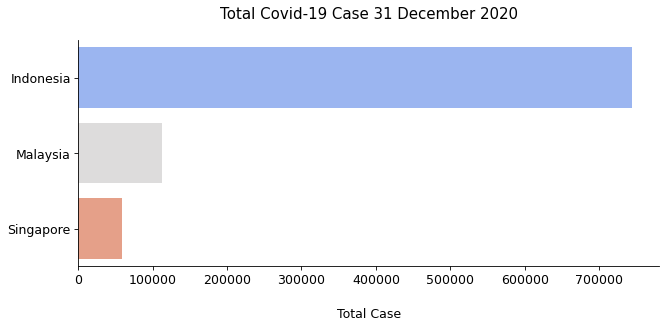

In [39]:
plt.figure(figsize=(10,4),dpi=75)
sns.barplot(y=['Indonesia','Malaysia','Singapore'],x=[max_id,max_mys,max_sgp],orient='h',palette='coolwarm')

plt.gca().spines['top'].set_visible(0)
plt.gca().spines['right'].set_visible(0)
plt.gca().set_xlabel('Total Case',labelpad=20)

plt.title('Total Covid-19 Case 31 December 2020',pad=20)
plt.savefig('Total Covid-19 Case 31 December 2020.png',transparent=True)
plt.show()

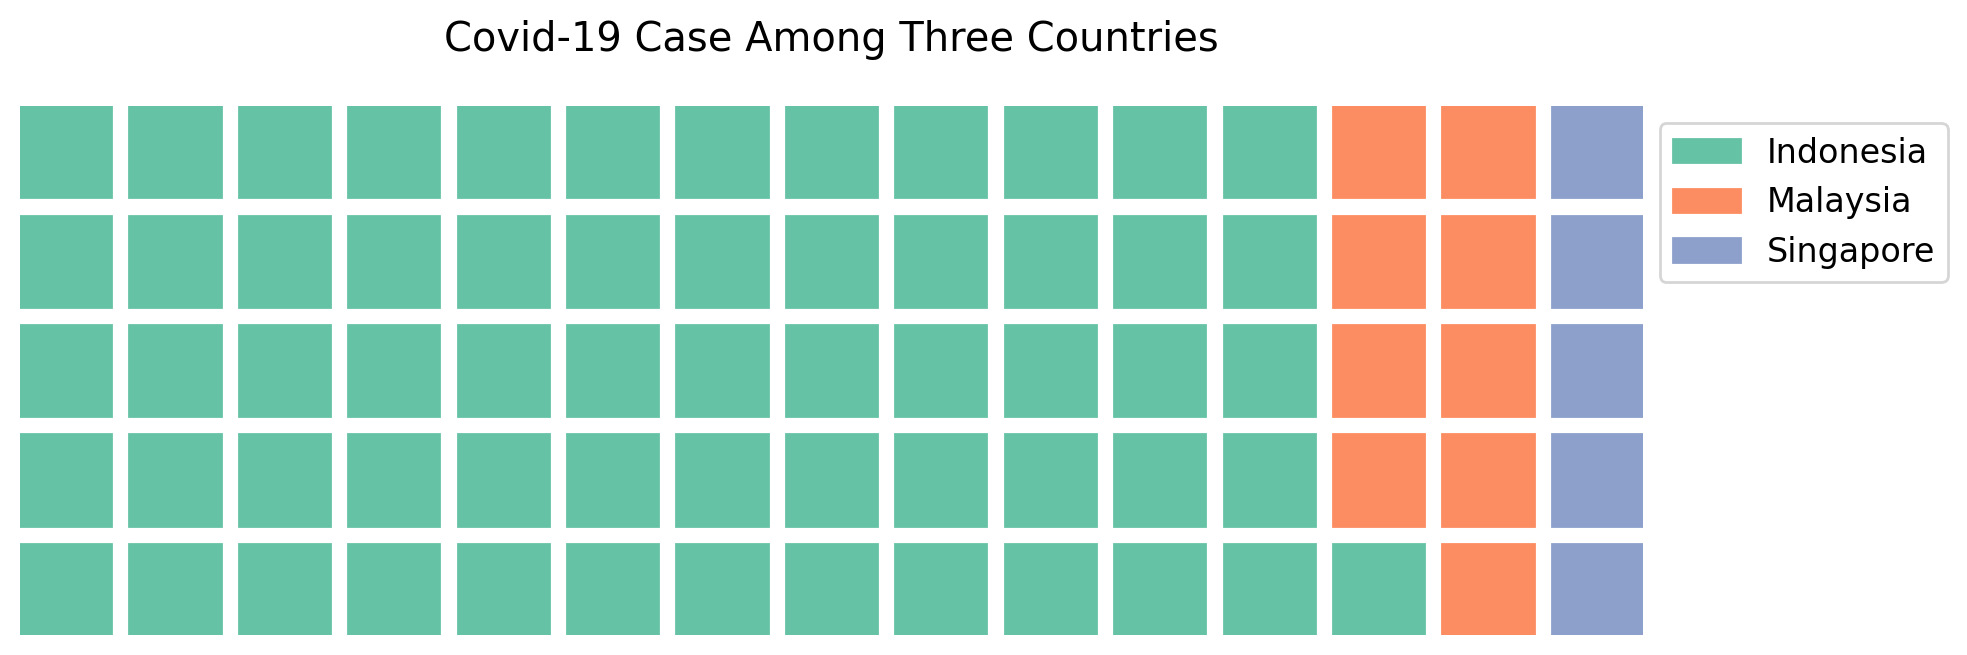

In [40]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=15,  # Either rows or columns could be omitted
    values={'Indonesia': max_id, 'Malaysia': max_mys, 'Singapore': max_sgp},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(10,4),
    dpi=200
)
plt.title("Covid-19 Case Among Three Countries",pad=20)
plt.show()